## I. Data Cleaning and Preprocessing (for dataset A)

### The dataset has missing values that needs to be fixed. 

In [1]:
# Importing Liabraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import scipy as sp
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('dataA.csv')
feature = list(df)

#reseting index
df = df.set_index('Unnamed: 0')             

In [3]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
arr = imp_mean.fit_transform(df)
arr = pd.DataFrame(arr)
arr.columns =  feature[1:]

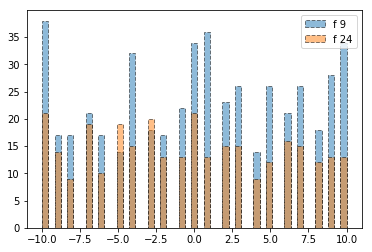

In [4]:
# Plot of feature 9 and 24 before applying normalization
bins = np.linspace(-10, 10, 50)
plt.hist(arr['fea.9'], bins, ls='dashed', alpha=0.5, edgecolor='black',label='f 9')
plt.hist(arr['fea.24'], bins, ls='dashed', alpha=0.5, edgecolor='black',label='f 24')
plt.legend(loc='upper right')
plt.show()

In [5]:
# Applying MinMax normalization
scaler = preprocessing.MinMaxScaler()
ar = scaler.fit_transform(arr)

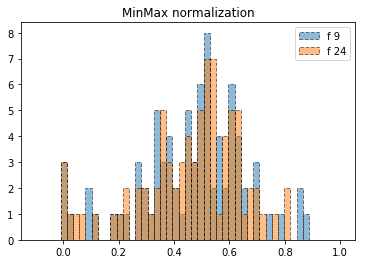

In [6]:
# Plot of feature 9 and 24 after MinMax normalization
bins = np.linspace(-0.1, 1, 50)
plt.hist(ar[9], bins, alpha=0.5, ls='dashed', edgecolor='black',label='f 9')
plt.hist(ar[24], bins, alpha=0.5, ls='dashed', edgecolor='black',label='f 24')
plt.legend(loc='upper right')
plt.title("MinMax normalization")
plt.show()

In [7]:
# Applying z-score normalization
np.seterr(divide='ignore', invalid='ignore')
ar = sp.stats.zscore(arr)

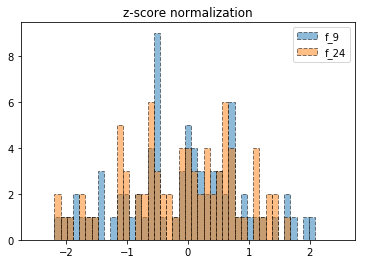

In [8]:
# Plot of feature 9 and 24 after z-score normalization 
bins = np.linspace(-2.5, 2.5, 50)
plt.hist(ar[9],bins,ls='dashed', alpha=0.5, edgecolor='black',label='f_9')
plt.hist(ar[24],bins,ls='dashed', alpha=0.5, edgecolor='black',label='f_24')
plt.legend(loc='upper right')
plt.title("z-score normalization")
plt.show()

### With min-max normalization, we were guaranteed to reshape our features to be between 0 and 1. Using z-score normalization, the features now has a range from about -2.5 to 1.5 for f_24 and -2.5 to 2.5 for f_9. This is certainly better than before; the x-axis, which previously had a range of -10 to 10.

### Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.

### Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.

# II. Feature Extraction (for dataset B)

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Importing the dataset
dataset = pd.read_csv("DataB.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 785].values

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = X.astype(float)
X = sc.fit_transform(X)

In [12]:
# Computing square matrix
X_transpose = np.transpose(X)
sq_matrix = np.matmul(X, X_transpose)

In [13]:
# Computing eigenvectors and eigenvalues
from numpy import linalg
eigenValues, eigenVectors = linalg.eig(sq_matrix)

print("Eigen Values : \n", eigenValues, "\n\n", "Eigen Vectors : \n", eigenVectors)

Eigen Values : 
 [1.07010200e+05+0.00000000e+00j 5.95708384e+04+0.00000000e+00j
 5.58207753e+04+0.00000000e+00j ... 3.94480106e-14+8.98217604e-15j
 3.94480106e-14-8.98217604e-15j 1.16814937e-14+0.00000000e+00j] 

 Eigen Vectors : 
 [[ 0.03072619+0.00000000e+00j -0.02687145+0.00000000e+00j
  -0.02090221+0.00000000e+00j ... -0.00022137+4.06860025e-04j
  -0.00022137-4.06860025e-04j -0.00140741+0.00000000e+00j]
 [ 0.0351438 +0.00000000e+00j -0.02996933+0.00000000e+00j
  -0.02095248+0.00000000e+00j ...  0.00022575+3.07667699e-05j
   0.00022575-3.07667699e-05j  0.00011637+0.00000000e+00j]
 [ 0.01144896+0.00000000e+00j -0.01972634+0.00000000e+00j
  -0.01027655+0.00000000e+00j ...  0.00042988-6.32379165e-05j
   0.00042988+6.32379165e-05j -0.00053037+0.00000000e+00j]
 ...
 [-0.00131092+0.00000000e+00j -0.00153744+0.00000000e+00j
   0.03545646+0.00000000e+00j ...  0.04721099-1.19650797e-02j
   0.04721099+1.19650797e-02j  0.03267299+0.00000000e+00j]
 [-0.00971464+0.00000000e+00j -0.00696176+0.000

In [14]:
# Applying PCA
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2)
X_pca1 = pca1.fit_transform(X)

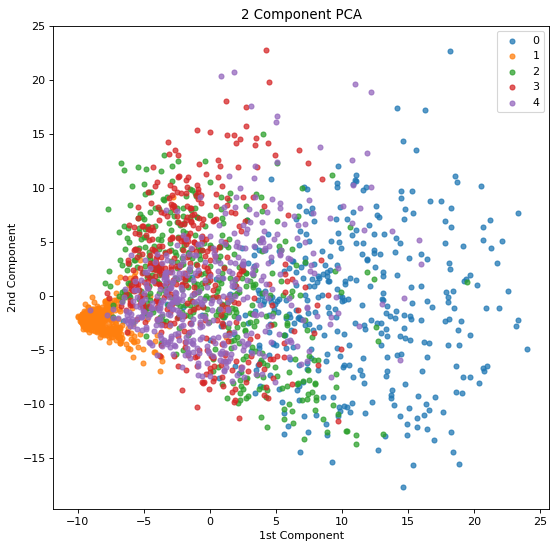

In [15]:
# Visualising the result
plt.figure(figsize=(8, 8), dpi=80)
for j in zip(np.unique(y)):
    plt.scatter(X_pca1[y == j, 0], X_pca1[y == j, 1], s=20, alpha=0.75)
plt.title('2 Component PCA')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.legend(np.unique(y))
plt.show()

### Principal component analysis (PCA) is a fast and flexible unsupervised method for dimensionality reduction in data. Recall that the data consists of 28×28 gray-scale (0-255) image of the digit, meaning that they are 784-dimensional. We use PCA to project them to 2 dimensions, which is a more manageable number of dimensions, to gain some intuition into the relationships between these points.

### The full data is a 784-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 784-dimensional space that allows us to see the layout of the digits in 2 dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### The 2-dimensional projections of the data results into a scattered representation of the 5 data classes and the classes are not distinguishable from one another.

In [16]:
# Applying PCA
pca2 = PCA(n_components = 6)
X_pca2 = pca2.fit_transform(X)
X_pca2 = X_pca2[:, 4:6]

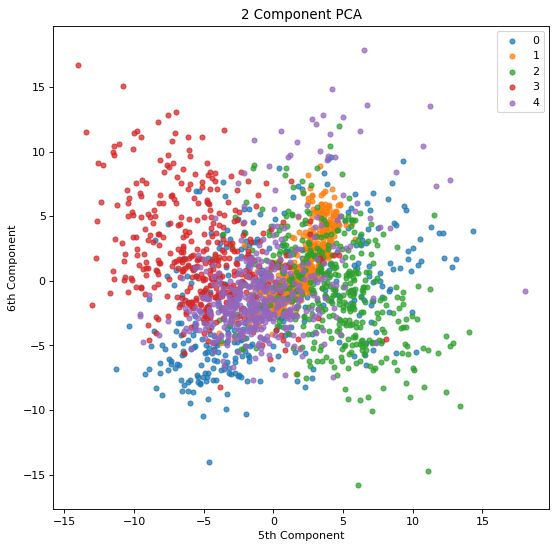

In [17]:
# Visualising the result
plt.figure(figsize=(8, 8), dpi=80)
for j in zip(np.unique(y)):
    plt.scatter(X_pca2[y == j, 0], X_pca2[y == j, 1], s=20, alpha=0.75)
plt.title('2 Component PCA')
plt.xlabel('5th Component')
plt.ylabel('6th Component')
plt.legend(np.unique(y))
plt.show()

### Comparing the PCA of 5th and 6th components with the 1st and 2nd components, we can see that the projection of data in 5th and 6th Principal Component are more cluttered at a particular region and the classes are not separable from one another. 

### From the two scatter plots of the classes into different 2-dimensionality we cannot accurately state the performance of data visualization. But by calculating the explained variance of the PCA components we can say that 1st and 2nd Components explains most of the variance than the 5th and 6th Components.

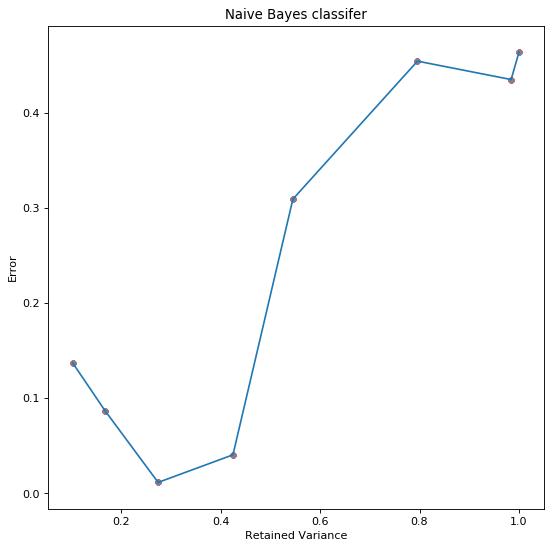

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

classifier = GaussianNB()

def classification_error(component):
    # Applying PCA
    pca = PCA(n_components = component)
    X_pca = pca.fit_transform(X)

    # Splitting the data into Train and Test set
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state = 0)
    
    # Splitting Classifier to the Training set
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set result
    y_pred = classifier.predict(X_test)
    
    # Calculating Classification Error
    error = abs((y_test - y_pred).sum()/y_test.shape[0])
    
    # Calculate Retained Variance
    retain_var = pca.explained_variance_ratio_.sum()
    
    return [retain_var, error]

# Calculating retain variance and error 
n_comp = [2, 4, 10, 30, 60, 200, 500, 784]
array = []
for i, j in enumerate(n_comp):
    array.append(classification_error(j))
result = np.array(array)

# Visualising the result
plt.figure(figsize=(8, 8), dpi=80)
for i in zip(n_comp):
    plt.scatter(result[:, 0], result[:, 1], s=20, alpha=0.75)
plt.plot(result[:, 0], result[:, 1])
plt.title("Naive Bayes classifer")
plt.xlabel("Retained Variance")
plt.ylabel("Error")
plt.show()

In [19]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_lda = lda.fit_transform(X, y)

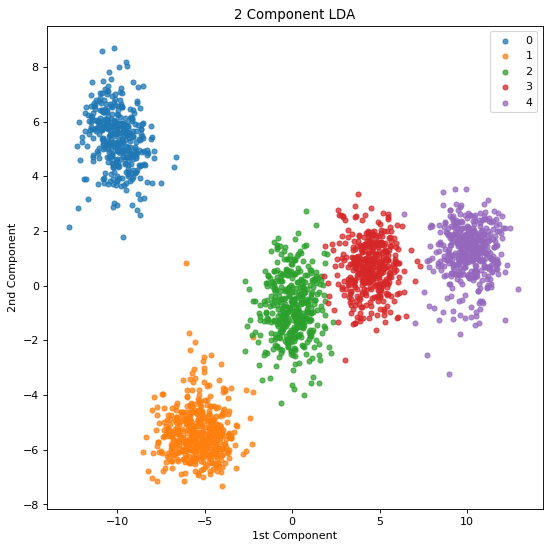

In [20]:
# Visualising the result
plt.figure(figsize=(8, 8), dpi=80)
for j in zip(np.unique(y)):
    plt.scatter(X_lda[y == j, 0], X_lda[y == j, 1], s=20, alpha=0.75)
plt.title('2 Component LDA')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.legend(np.unique(y))
plt.show()

### From the plot of 2 LDA Components it is visible that all the five classes are clustered separately and are well distinguished from each other.

### According the result obtained from PCA, we can observe that the classes are overlapping one another, where else the classes are well separated in the result obtained from LDA. That explains, PCA finds the component axes that maximizes the variance, on the other hand LDA finds the axes that maximizes the separation between multiple classes. 


# II. Nonlinear Dimensionality Reduction (for dataset B)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import scipy as sp
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
import sklearn 

In [22]:
# Loading data
df = pd.read_csv('dataB.csv')
feature = list(df)
df.head(5)

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0


In [23]:
df=df.set_index('Unnamed: 0')
df.head(5)

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,4,4,3,0,0,4,2,1,4,1,...,1,3,0,4,2,1,1,4,5,0
2,5,1,4,3,1,3,5,1,4,4,...,1,1,3,3,1,3,3,5,4,0
3,1,3,0,3,1,1,0,1,0,2,...,3,0,2,4,2,2,1,2,4,0
4,5,3,2,3,5,2,2,0,4,5,...,5,4,5,1,4,4,2,4,4,0
5,3,5,3,3,0,4,1,1,4,3,...,1,3,3,3,1,2,4,1,1,0


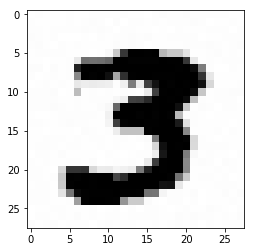

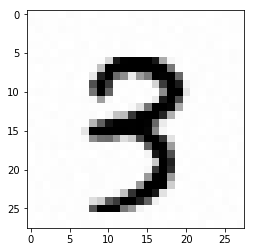

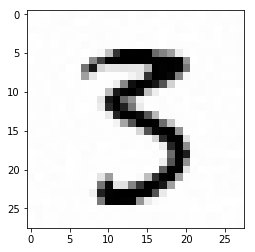

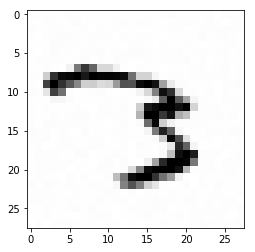

In [24]:
# Visualizing 4 original images
for i in range(4):
    img_num = np.random.randint(1239, 1636)
    img = df.iloc[img_num,0:784].values.reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.show()

In [25]:
from sklearn.manifold import (LocallyLinearEmbedding,Isomap)
embedding_lle = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=5, n_components = 4)
embedding_lle

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=4,
            n_jobs=None, n_neighbors=5, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)

In [26]:
transformed = embedding_lle.fit_transform(df.loc[df['gnd'] == 3])
transformed.shape

(398, 4)

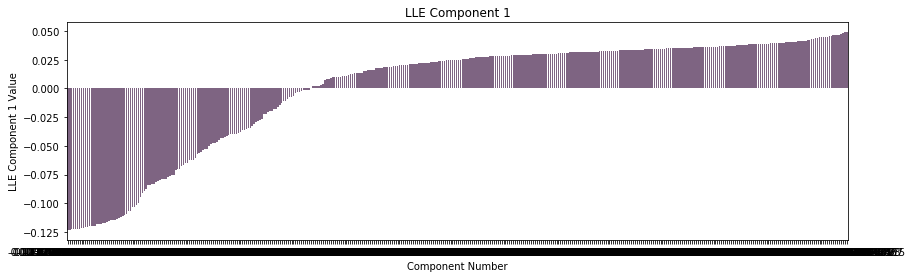

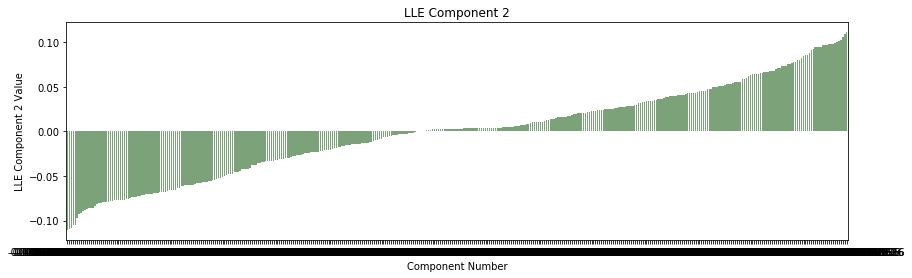

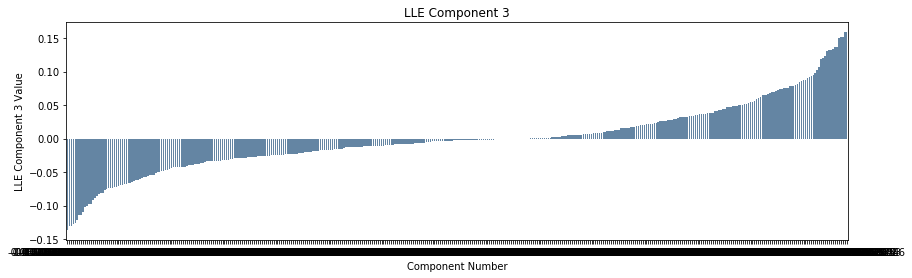

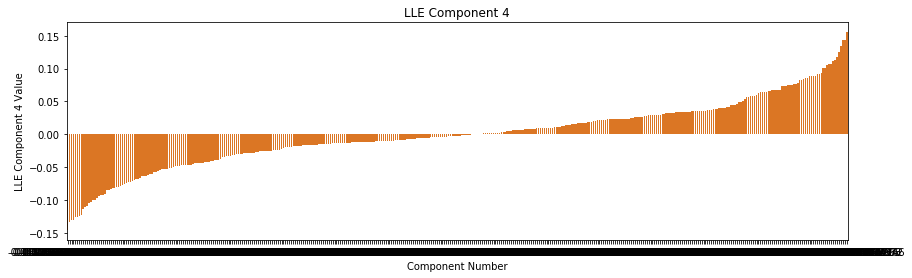

In [27]:
colors = [sns.xkcd_rgb[z] for z in ['dusty purple','dusty green','dusty blue','orange']]
for i in range(4):
    fig = plt.figure(figsize=(14,4))
    sns.barplot(list(transformed.T[i]), transformed.T[i], color=colors[i])
    plt.xlabel('Component Number')
    plt.ylabel('LLE Component '+str(i+1)+' Value')
    plt.title('LLE Component '+str(i+1))
    plt.show()

In [28]:
new = pd.DataFrame(transformed,  columns=['Component 1', 'Component 2', 'Component 3', 'Component 4'] )
new.head(5)

,Component 1,Component 2,Component 3,Component 4
0,-0.106621,0.000231,-0.006407,-0.007928
1,0.039745,0.065271,0.021327,-0.078327
2,0.032129,-0.104983,-0.121800,-0.032787
3,-0.039998,-0.023810,-0.025996,-0.007416
4,0.024623,-0.037539,-0.036392,0.002536


In [29]:
#drop component 3 & 4 from LLE component
new = new.drop(['Component 3','Component 4'], axis=1)             
new.head(5)

,Component 1,Component 2
0,-0.106621,0.000231
1,0.039745,0.065271
2,0.032129,-0.104983
3,-0.039998,-0.023810
4,0.024623,-0.037539


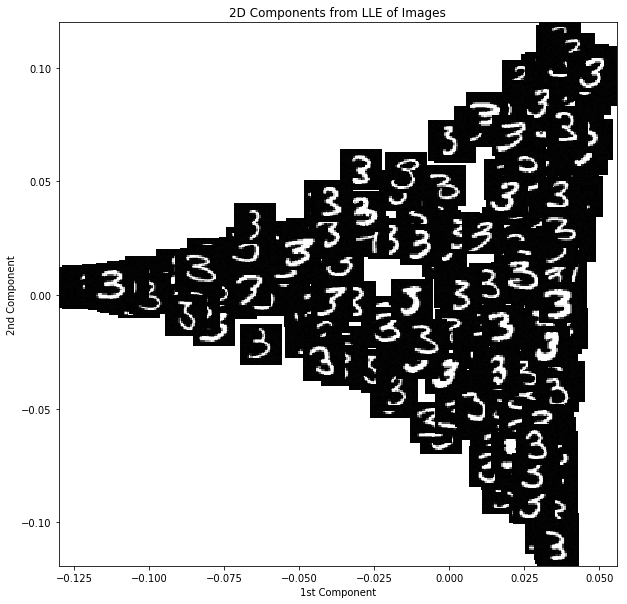

In [30]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from LLE of Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(new['Component 1']) - min(new['Component 1'])) * 0.08
y_size = (max(new['Component 2']) - min(new['Component 2'])) * 0.08
for i in range(398):
    img_num = np.random.randint(1239, 1636)
    x0 = new.loc[i, 'Component 1'] - (x_size / 2.)
    y0 = new.loc[i, 'Component 2'] - (y_size / 2.)
    x1 = new.loc[i, 'Component 1'] + (x_size / 2.)
    y1 = new.loc[i, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,0:784].values.reshape(28,28)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(new['Component 1'], new['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('2nd Component')
ax.set_xlabel('1st Component')

plt.show()

In [31]:
y=[3]*398
# Scale and visualize the embedding vectors

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})


    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        plt.xlabel('1st Component')
        plt.ylabel('2nd Component')

#### This plot is only to help and see how points are distributed in LLE, since above graph looks cluttered

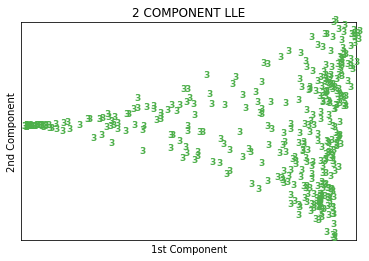

In [32]:
plot_embedding(new.values, '2 COMPONENT LLE')

#### The graph represent wider range of manifolds whose local properties are captured by Euclidean geometry.

In [33]:
# Computing Isomap with 4 components and 5 neighbours
embedding_iso = sklearn.manifold.Isomap(n_neighbors=5, n_components = 4)
transformed = embedding_iso.fit_transform(df.loc[df['gnd'] == 3])

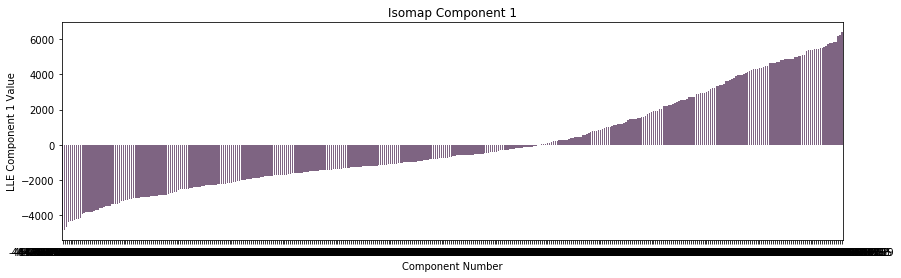

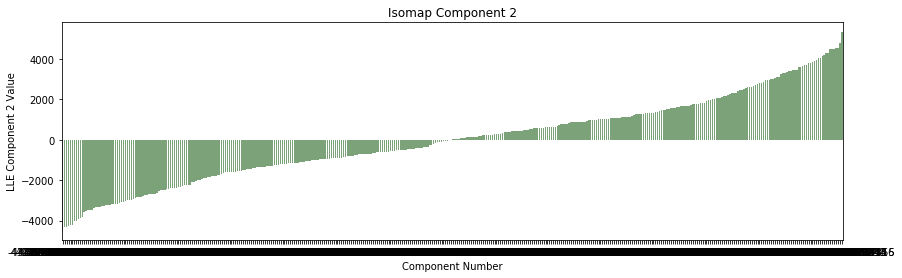

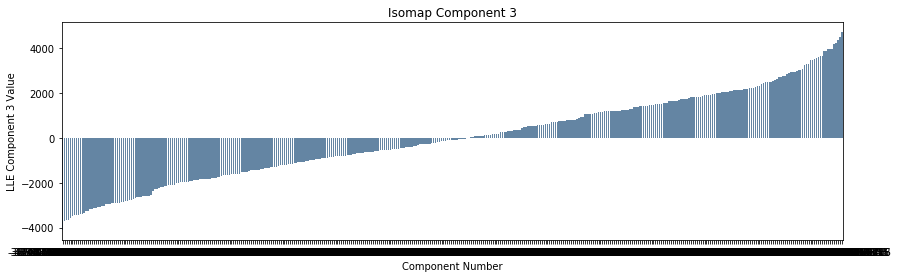

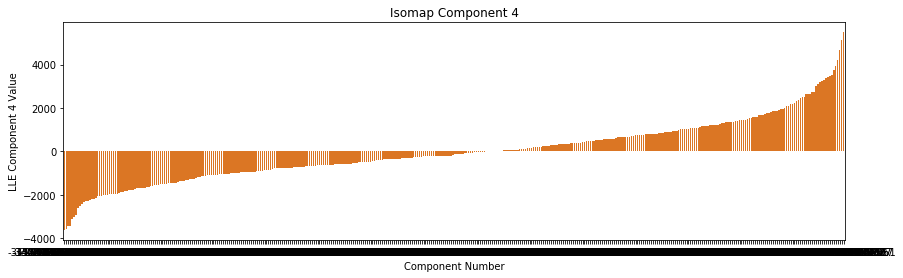

In [34]:
colors = [sns.xkcd_rgb[z] for z in ['dusty purple','dusty green','dusty blue','orange']]
for i in range(4):
    fig = plt.figure(figsize=(14,4))
    sns.barplot(list(transformed.T[i]), transformed.T[i], color=colors[i])
    plt.xlabel('Component Number')
    plt.ylabel('LLE Component '+str(i+1)+' Value')
    plt.title('Isomap Component '+str(i+1))
    plt.show()

In [35]:
new = pd.DataFrame(transformed,  columns=['Component 1', 'Component 2', 'Component 3', 'Component 4'] )
new.head(5)

,Component 1,Component 2,Component 3,Component 4
0,4374.088140,1846.119626,2859.114285,255.042563
1,-139.012696,-627.652030,-1917.862343,-1313.950149
2,-2386.818004,505.515582,3540.244157,-474.972488
3,2707.756346,1103.644366,3897.302167,-188.354470
4,-2914.155127,742.414660,1522.145555,3931.599361


In [36]:
# drop component 3 & 4 from ISOMAP component
new = new.drop(['Component 3','Component 4'], axis=1)
new.head(5)

,Component 1,Component 2
0,4374.088140,1846.119626
1,-139.012696,-627.652030
2,-2386.818004,505.515582
3,2707.756346,1103.644366
4,-2914.155127,742.414660


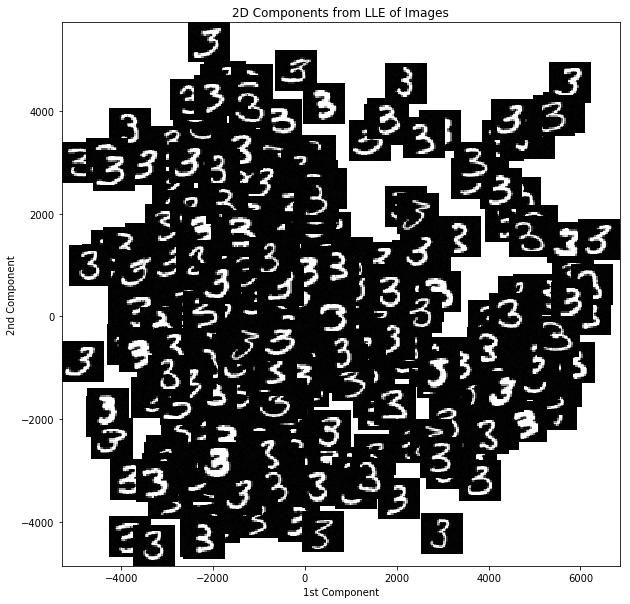

In [37]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from LLE of Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(new['Component 1']) - min(new['Component 1'])) * 0.08
y_size = (max(new['Component 2']) - min(new['Component 2'])) * 0.08
for i in range(398):
    img_num = np.random.randint(1239, 1636)
    x0 = new.loc[i, 'Component 1'] - (x_size / 2.)
    y0 = new.loc[i, 'Component 2'] - (y_size / 2.)
    x1 = new.loc[i, 'Component 1'] + (x_size / 2.)
    y1 = new.loc[i, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,0:784].values.reshape(28,28)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(new['Component 1'], new['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('2nd Component')
ax.set_xlabel('1st Component')

plt.show()

##### This plot is only to help and see how points are distributed in Isomap, since above graph looks cluttered

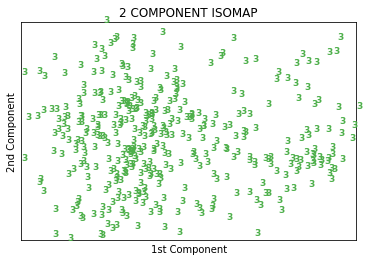

In [38]:
plot_embedding(new.values, '2 COMPONENT ISOMAP')

#### We have reduced the dimensions from 784 dimensions (pixels) to just 2 dimensions. These 2 dimensions represent the different points of view of the digit, from left to right and from bottom to top. ISOMAP captures the geometric properties of the space in which the data resides. In this scatter plot the class in not clustered in one region. But the graph produced from 2 LLE Components produces a better result as the classed were more clustered than this graph. The patter found in this graph is globally based.

In [39]:
lable = df["gnd"]
df = df.drop(["gnd"], axis=1)
transformed_LLE = embedding_lle.fit_transform(df)
transformed_LLE = pd.DataFrame(transformed_LLE)
transformed_LLE.head(5)

,0,1,2,3
0,0.045258,0.000862,-0.000511,0.000526
1,0.045061,0.000828,-0.000496,0.000479
2,0.044573,0.000926,-0.000080,0.001249
3,0.044700,0.000871,-0.000293,0.000929
4,0.046829,0.001124,-0.000664,0.000852


In [40]:
# Training and fitting NB classiffier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
clf = GaussianNB()
clf

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
score_lle = list()
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(transformed_LLE, lable, test_size=0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score_lle.append(metrics.accuracy_score(y_test,y_pred))

In [42]:
score_lle

[0.9145161290322581,
 0.9161290322580645,
 0.9258064516129032,
 0.9080645161290323,
 0.9209677419354839]

In [43]:
print("Average LLE navie bayes classification error after 5 trainig iteration is:", np.mean(score_lle))

Average LLE navie bayes classification error after 5 trainig iteration is: 0.9170967741935485


In [44]:
transformed_ISO = embedding_iso.fit_transform(df)
transformed_ISO = pd.DataFrame(transformed_ISO)
transformed_ISO.head(5)

,0,1,2,3
0,8706.049952,344.127405,344.048497,1657.818864
1,8858.821154,333.866129,-280.234058,1752.912922
2,3954.252089,926.795027,-1093.258392,43.631241
3,5791.867059,643.647584,-552.428333,256.098798
4,10700.083472,-281.608819,-768.689592,108.528612


In [45]:
score_iso = list()
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(transformed_ISO, lable, test_size=0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score_iso.append(metrics.accuracy_score(y_test,y_pred))

In [46]:
score_iso

[0.8983870967741936,
 0.8790322580645161,
 0.8709677419354839,
 0.8870967741935484,
 0.8483870967741935]

In [47]:
print("Average Isomap navie bayes classification error after 5 trainig iteration is:", np.mean(score_iso))

Average Isomap navie bayes classification error after 5 trainig iteration is: 0.876774193548387


In [48]:
transformed_PCA = PCA(n_components = 4)
transformed_PCA = transformed_PCA.fit_transform(X)
transformed_PCA = pd.DataFrame(transformed_PCA)
score_pca = list()
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(transformed_PCA, lable, test_size=0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score_pca.append(metrics.accuracy_score(y_test,y_pred))

In [49]:
score_pca

[0.7806451612903226,
 0.8032258064516129,
 0.7790322580645161,
 0.8080645161290323,
 0.7870967741935484]

In [50]:
print("Average PCA navie bayes classification error after 5 trainig iteration is:", np.mean(score_pca))

Average PCA navie bayes classification error after 5 trainig iteration is: 0.7916129032258066


In [51]:
y = dataset.iloc[:, 785].values
transformed_LDA = LDA(n_components = 4)
transformed_LDA = transformed_LDA.fit_transform(X, y)
transformed_LDA = pd.DataFrame(transformed_LDA)
score_lda = list()
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(transformed_LDA, lable, test_size=0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score_lda.append(metrics.accuracy_score(y_test,y_pred))

In [52]:
print("Average LDA navie bayes classification error after 5 trainig iteration is:", np.mean(score_lda))

Average LDA navie bayes classification error after 5 trainig iteration is: 0.9993548387096775


In [53]:
acc_score = {'PCA':[np.mean(score_pca)], 'LDA':[np.mean(score_lda)], 'LLE':[np.mean(score_lle)], 'ISOMAP':[np.mean(score_iso)]}
print("Average accuracy: \n\n", pd.DataFrame(acc_score))

Average accuracy: 

         PCA       LDA       LLE    ISOMAP
0  0.791613  0.999355  0.917097  0.876774


#### The number of iterations is justified as there is less variation of accuracy score in each iteration and the accuracy score is above 80% on average for each model.

#### From the Average accuracy table above, we can conclude that LDA performance is better than LLE and ISOPMAP as its accuracy score is highest in the table. Wherelse PCA performance has lower average score than LLE and ISOMAP.